In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# warning 무시

import warnings
warnings.filterwarnings("ignore")

In [106]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

--- 
### 2개의 y축을 갖는 그래프 작성
- 남북한 발전량
- 막대그래프는 북한의 발전량
- 선 그래프는 북한 발전량의 전년대비 증감률을 백분율로 표시

In [4]:
df = pd.read_excel('../Data/남북한발전전력량.xlsx', convert_float=True) 
# convert_float을 해주면 숫자를 전부 다 float으로 바꿔서 옴
df.head()

/var/folders/j9/zr30dj9x51x0cxznxz0064t80000gn/T/ipykernel_23620/2302476553.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('../Data/남북한발전전력량.xlsx', convert_float=True) # << convert_float을 해주면 숫자를 전부 다 float으로 바꿔서 옴


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [7]:
# 북한 전력량만 선택
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [9]:
# 어차피 북한것만 먼저 작업할꺼라 북한임을 알려주는 첫번째 컬럼(전력량 (억㎾h)) 은 필요가 없음
df.drop('전력량 (억㎾h)', axis=1,inplace=True)
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [10]:
#발전전력별을 index로 고정하기
df.set_index('발전 전력별', inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [13]:
# 기준점을 발전 전력별로 변경 
df = df.T
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [15]:
# 합계 컬럼을 총 발전량으로 변경
df = df.rename(columns={'합계':'총발전량'})
df['작년도 총발전량'] = df['총발전량'].shift(1) #< shift: 전(prev) 행의 데이터를 선택
df

발전 전력별,총발전량,수력,화력,원자력,작년도 총발전량
1990,277,156,121,-,None
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [17]:
# 증감율 Column 생성
df['증감율'] = (df['총발전량'] / df['작년도 총발전량'] - 1) *100
df

발전 전력별,총발전량,수력,화력,원자력,작년도 총발전량,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


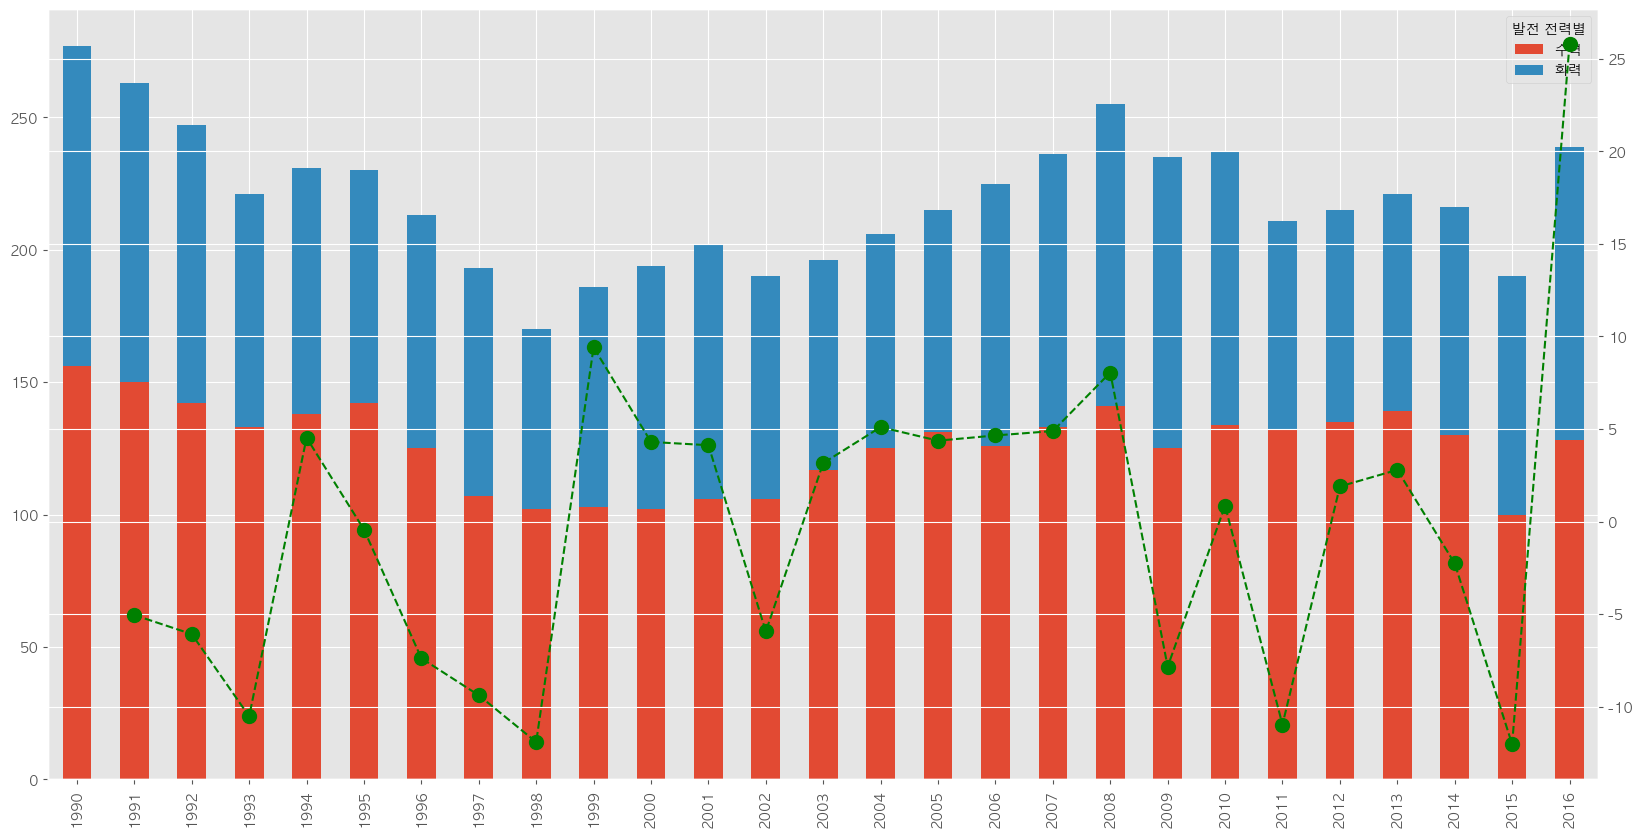

In [24]:
plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(
    kind='bar',
    figsize=(20,10),
    stacked = True #< 누적 막대그래프로 만드는 녀석
)

ax2 = ax1.twinx() # < twinx copy랑 조금 다른데 다른거?? 쌍둥이?
ax2.plot(
    df.index,
    df['증감율'],
    ls='--', # line style
    marker = 'o',
    markersize = 10,
    color = 'green',
    label='전년대비 증감율(%)'
)

plt.show()

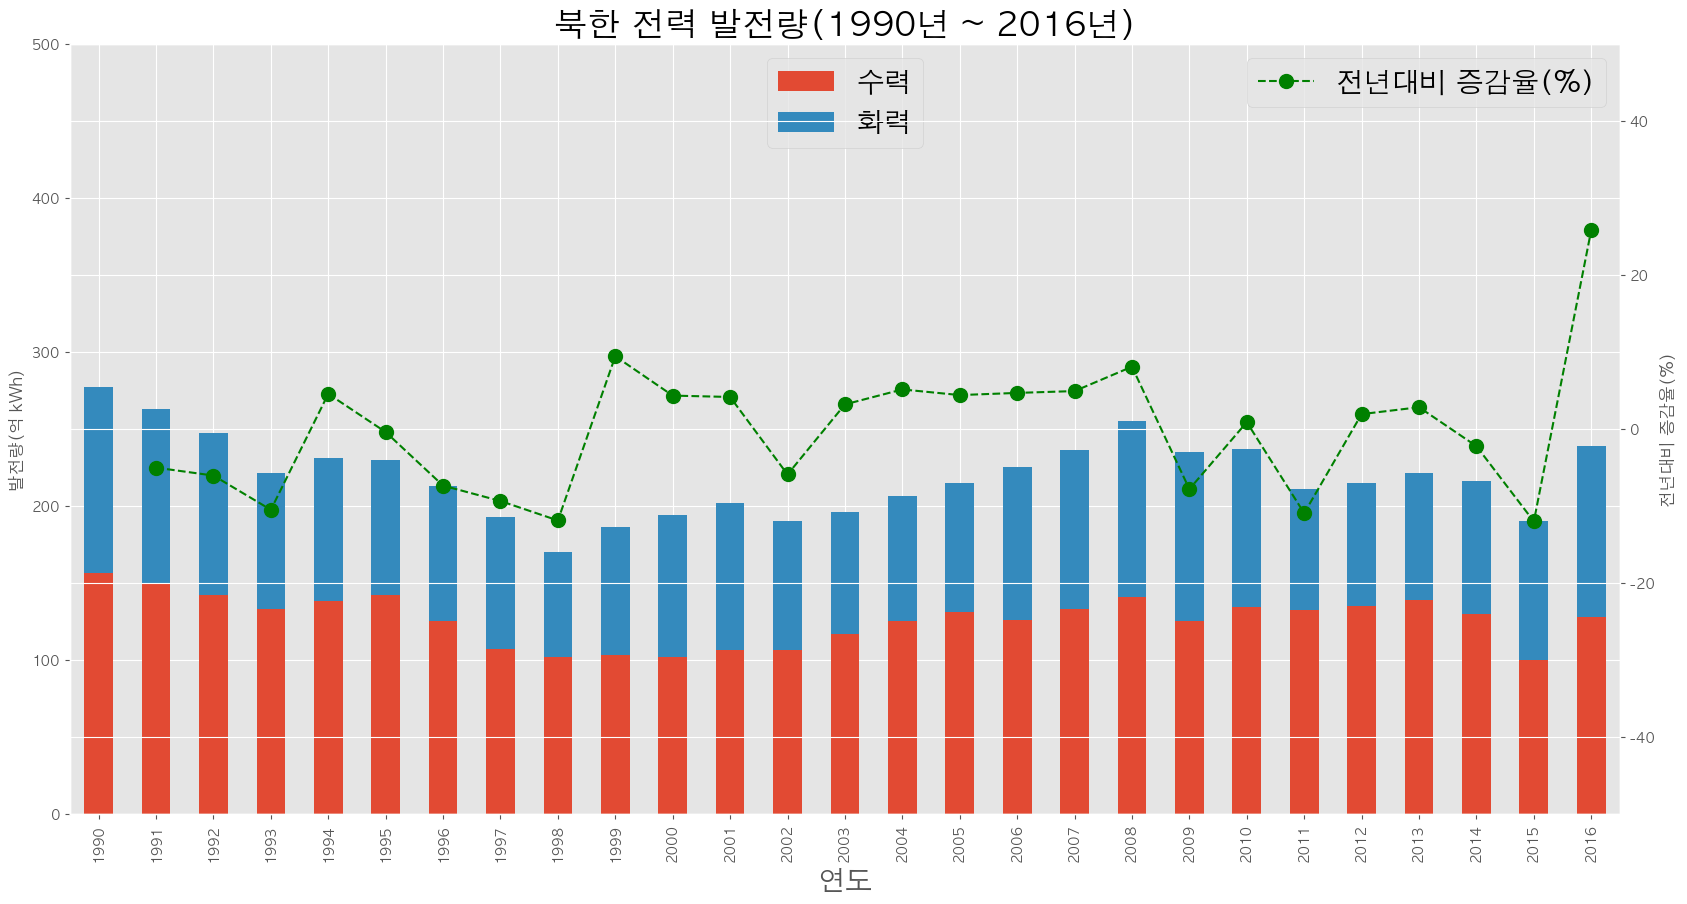

In [36]:
# 선 그래프 위치 조정 
#
#

plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(
    kind='bar',
    figsize=(20,10),
    stacked = True #< 누적 막대그래프로 만드는 녀석
)

ax2 = ax1.twinx() # < twinx copy랑 조금 다른데 다른거?? 쌍둥이?
ax2.plot(
    df.index,
    df['증감율'],
    ls='--', # line style
    marker = 'o',
    markersize = 10,
    color = 'green',
    label='전년대비 증감율(%)'
)

#---
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도',size = 20)
ax1.set_ylabel('발전량(억 kWh)')
ax2.set_ylabel('전년대비 증감율(%)')

plt.title('북한 전력 발전량(1990년 ~ 2016년)', size = 24)

ax1.legend(loc="upper center", fontsize=20)
ax2.legend(loc="upper right", fontsize=20)

plt.show()

---
# Histogram
: 단위별(Column별) 데이터의 빈도수를 그래프로 표현

In [98]:
df = pd.read_csv('../Data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


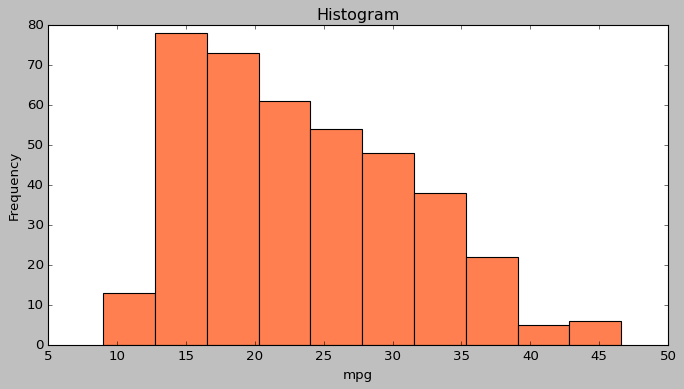

In [45]:
plt.style.use('classic')
df[0].plot(
    kind='hist',
    bins= 10, # bins = 범위
    color='coral',
    figsize=(10,5)
)
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

In [41]:
# 애들 보니까 min 9, max 46이니까 bins를 10으로 나눠서 보자
df[0].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: 0, dtype: float64

> 자동차의 연비값은 대부분은 좌측편향이 되어 연비가 낮은 구간에 집중되어 있는 경향을 보인다.

---
### 산점도
: 서로 다른 두변수의 관계를 나타낸다

In [56]:
# 실린더의 갯수를 상대적 비율로 계산하여 산포도에 점의 크기에 반영한다.
    # 상대적 비율은 MAX 값이 기준이 된다
cylinder_size = df[1] / df[1].max()
cylinder_size

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
393    0.5
394    0.5
395    0.5
396    0.5
397    0.5
Name: 1, Length: 398, dtype: float64

In [59]:
# 1 , 0.5는 너무 작아 그래프에 잘 보이지가 않을거 같아서 임의의 숫자를 대충 만듬  # Hyper parameter
# cylinder_size = df[1] / df[1].max() * 300 #<< 이 300이 임의의 값을 개발자가 분석가가 넣는값, 100을 넣던 300을 넣던 ... 
cylinder_size = df[1] / df[1].max() * 100 #<< 300 은 점 크기가 너무 큰거 같아 100으로 조정 
cylinder_size

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
393     50.0
394     50.0
395     50.0
396     50.0
397     50.0
Name: 1, Length: 398, dtype: float64

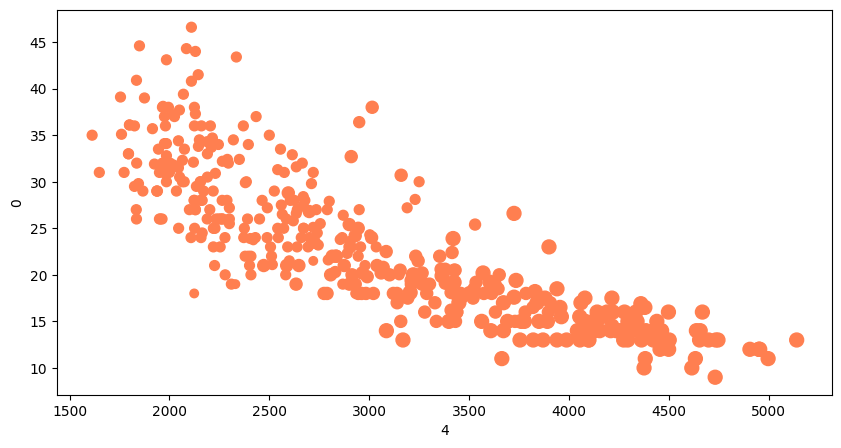

In [60]:
# plt.style.use('ggplot')
plt.style.use('default')

df.plot(
    kind='scatter',
    x = 4,
    y = 0,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(10,5)
)
# plt.title('역상관을 잘 띄고 있따')
plt.xlabel('4')
plt.show()


### Bubble Chart

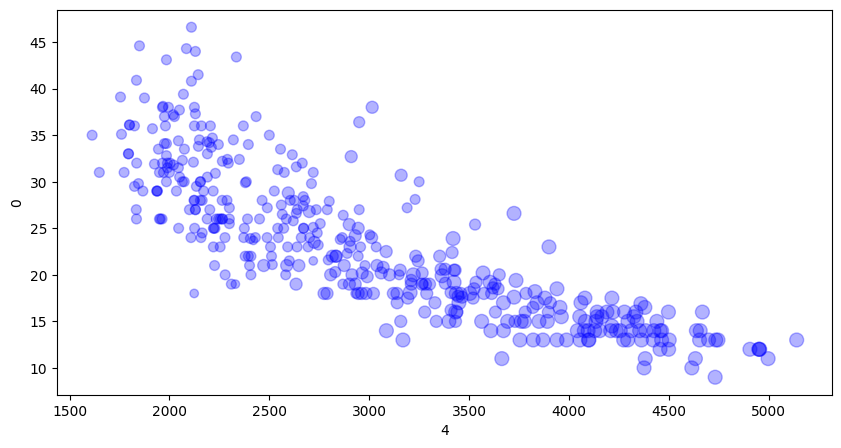

In [66]:
plt.style.use('default')

df.plot(
    kind='scatter',
    x = 4,
    y = 0,
    c = 'blue',
    # s = 10, #산점도 점의 크기 
    s = cylinder_size,  #원이 크고 작은게 있음 
    alpha = 0.3, # << 투명도, 진하면 많이 겹쳐 있음을 표현 할 수 있음 
    figsize=(10,5)
)
# plt.title('역상관을 잘 띄고 있따')
plt.xlabel('4')
plt.show()


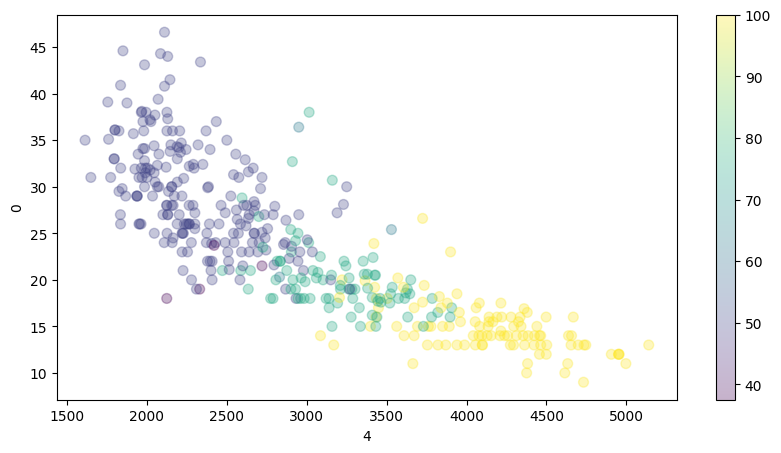

In [74]:
plt.style.use('default')

df.plot(
    kind='scatter',
    x = 4,
    y = 0,
    c = cylinder_size, # color를 sylinder 값으로 바꺼줌.
    s = 50, 
    alpha = 0.3, # << 투명도, 진하면 많이 겹쳐 있음을 표현 할 수 있음 
    figsize=(10,5),
    marker='o',
    cmap = 'viridis',#color map
)
plt.show()


---
### Pie Chart
: Data값이 전체중에서 차지하는 비율

In [103]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [77]:
# 자동차의 국가별 데이터 갯수를 파이차트로 표현

# 1:USA, 2:EU, 3:Japan
# origin 은 1,2,3 으로 되어 있어서 이걸 sum 해버리면 원하는 값을 구할 수 없음 
# 국가별 Count를 계산하기 위해 Column 하나 생성
df['count'] = 1
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [78]:
# origin 열을 기준으로 Group화, Sum
df_origin = df.groupby('origin').sum()
df_origin


,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [79]:
# count Column을 구하는게 목적, index를 이제 국가별 이름으로 바꾸자 
df_origin.index = ['USA','EU','JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


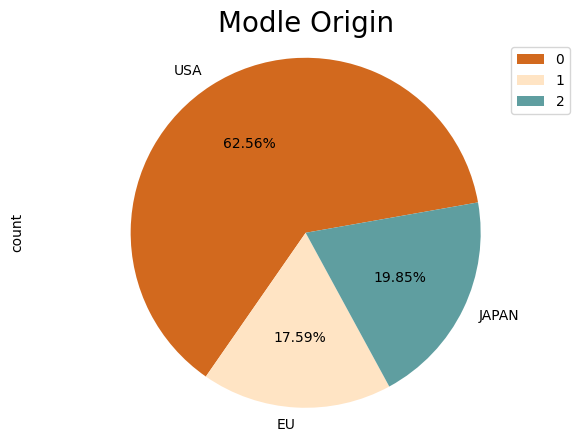

In [97]:
#df_origin 의 index 와 count Column으로 pie chart 그리기

df_origin['count'].plot(
    kind='pie',
    figsize=(7,5),
    autopct = '%.2f%%', # auto percent
    startangle = 10, # 시작지점을 약간 10도 삐딱하게 만들어서 챠트를 그리고 싶다 
    colors=['chocolate','bisque','cadetblue'],
)

plt.title('Modle Origin', size=20)
plt.axis('equal') # << pie chart 원이 삐딱할때가 있는데 이걸 쓰면 이쁜 원이 만들어진다..??
plt.legend(
    labels=df.origin.index,
    loc='upper right',
)
plt.show()

---
### Box plot
: 범주형 데이터의 분포 확인 

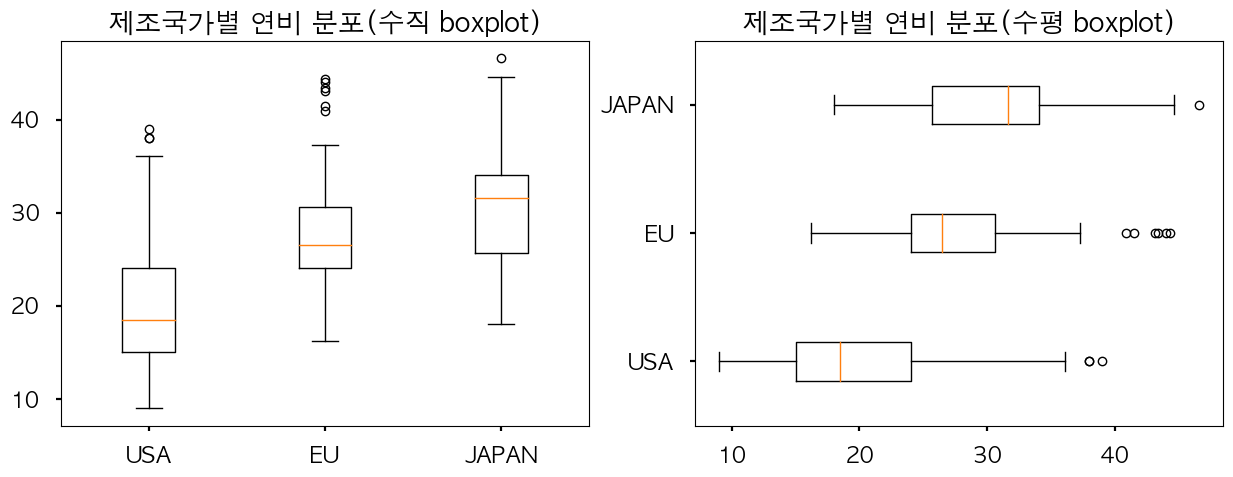

In [114]:
# 국가별 연비에 대해 boxplot 을 찍어 보자

plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(
    x = [
        df[df['origin']==1]['mpg'],
        df[df['origin']==2]['mpg'],
        df[df['origin']==3]['mpg'],
    ],
    labels=['USA','EU','JAPAN']
)
ax1.set_title('제조국가별 연비 분포(수직 boxplot)')

ax2.boxplot(
    x = [
        df[df['origin']==1]['mpg'],
        df[df['origin']==2]['mpg'],
        df[df['origin']==3]['mpg'],
    ],
    labels=['USA','EU','JAPAN'],
    vert = False #vertical
)
ax2.set_title('제조국가별 연비 분포(수평 boxplot)')

plt.show()